In [4]:
%load_ext rpy2.ipython

In [148]:
from IPython.display import FileLink

In [7]:
%%R
library(dplyr); library(tidyr)
library(phyloseq)
library(ggplot2)
library(vegan)
library(FField)

In [41]:
%%R
counts = read.csv("../data/Ox/Ox_H.csv") %>%
    t %>% {
        l = ncol(.)
        colnames(.) = paste("gene.", 1:l, sep="")
        .
       .
    }

counts = otu_table(counts, taxa_are_rows = FALSE)

In [46]:
%%R
sd = data.frame(Sample = rownames(counts))

rownames(sd) = sd$Sample

sd = sample_data(sd)

In [48]:
%%R
ps = phyloseq(sd, counts)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11589 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 1 sample variables ]


Square root transformation
Wisconsin double standardization
Run 0 stress 0.05351107 
Run 1 stress 0.05294966 
... New best solution
... procrustes: rmse 0.02761742  max resid 0.06833906 
Run 2 stress 0.1550971 
Run 3 stress 0.05294882 
... New best solution
... procrustes: rmse 0.0004521417  max resid 0.0009872579 
*** Solution reached


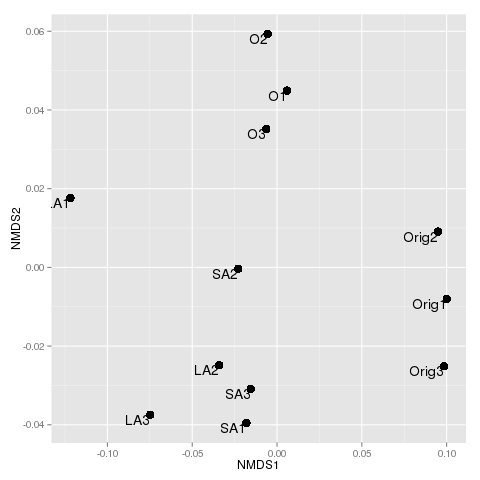

In [55]:
%%R
ord = ordinate(ps, method = "NMDS", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)

d = ord.plot

d$Sample = rownames(d)

p = ggplot(d, aes(x = NMDS1, y = NMDS2, label = Sample))

p = p + geom_point(size = 4)

p = p + geom_text(hjust = 1, vjust = 1)

p

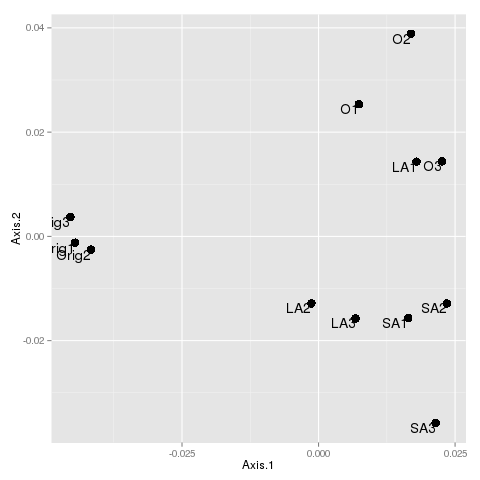

In [56]:
%%R
ord = ordinate(ps, method = "MDS", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)

d = ord.plot

d$Sample = rownames(d)

p = ggplot(d, aes(x = Axis.1, y = Axis.2, label = Sample))

p = p + geom_point(size = 4)

p = p + geom_text(hjust = 1, vjust = 1)

p

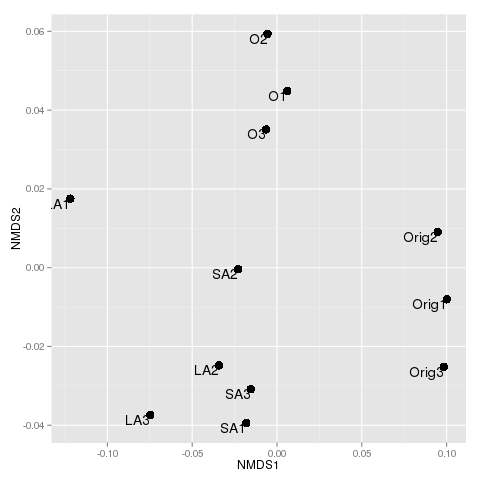

In [54]:
%%R
